In [1]:
import tensorflow as tf
tf.__version__

'2.18.0'

In [2]:
import matplotlib.pyplot as plt

In [3]:
(x_train  , y_train) , (x_test , y_test) = tf.keras.datasets.fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
y_train[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [8]:
x_train[:10]

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       ...,

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0

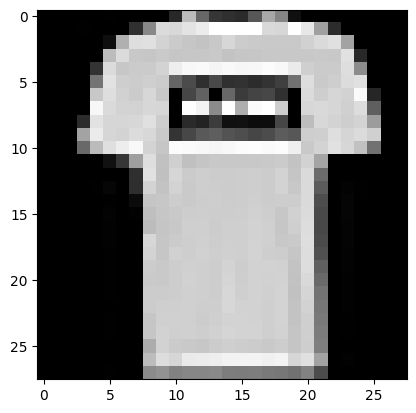

In [9]:
plt.imshow(x_train[1] , cmap = 'gray')

In [10]:
x_train , x_test = x_train /255.0 , x_test/255.0

In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = [28,28]))
model.add(tf.keras.layers.Dense(100 , activation="relu"))
model.add(tf.keras.layers.Dense(75 , activation="relu"))
model.add(tf.keras.layers.Dense(10 , activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 75)             │         7,575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           760 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 86,835 (339.20 KB)

 Trainable params: 86,835 (339.20 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [14]:
model.layers[1].get_weights()

[array([[ 0.02615923, -0.02182961, -0.03357044, ..., -0.06232631,
          0.06559572,  0.00896699],
        [-0.07113253,  0.0683831 ,  0.0378315 , ..., -0.00970591,
         -0.02454981, -0.02458075],
        [-0.01591655, -0.07171867, -0.03015457, ..., -0.01116943,
          0.01295082, -0.03662093],
        ...,
        [-0.0379257 ,  0.02715753, -0.03067894, ..., -0.00121511,
          0.05366807, -0.03457654],
        [-0.07130082, -0.0771669 ,  0.01842949, ..., -0.0319159 ,
         -0.04487173, -0.04155589],
        [-0.06080837, -0.0551493 , -0.03474813, ...,  0.04341333,
          0.0481941 ,  0.04993138]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [15]:
model.compile(loss = "sparse_categorical_crossentropy" , optimizer = "sgd" , metrics = ["accuracy"])

In [16]:
history = model.fit(x_train , y_train , epochs =50 ,validation_split=.15)

Epoch 1/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6379 - loss: 1.1446 - val_accuracy: 0.7929 - val_loss: 0.5863
Epoch 2/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8209 - loss: 0.5241 - val_accuracy: 0.8317 - val_loss: 0.4822
Epoch 3/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8364 - loss: 0.4699 - val_accuracy: 0.8412 - val_loss: 0.4511
Epoch 4/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8487 - loss: 0.4338 - val_accuracy: 0.8492 - val_loss: 0.4333
Epoch 5/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8520 - loss: 0.4185 - val_accuracy: 0.8481 - val_loss: 0.4359
Epoch 6/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8614 - loss: 0.3947 - val_accuracy: 0.8597 - val_loss: 0.3988
Epoch 7/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8658 - loss: 0.3849 - val_accuracy: 0.8660 - val_loss: 0.3918
Epoch 8/50
1594/1594 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8651 - loss: 0.3795 - 

In [17]:
history.history

{'accuracy': [0.7378039360046387,
  0.8226274251937866,
  0.8379607796669006,
  0.8484901785850525,
  0.8559019565582275,
  0.8609803915023804,
  0.8648823499679565,
  0.8690000176429749,
  0.870941162109375,
  0.875,
  0.8774117827415466,
  0.8792744874954224,
  0.88188236951828,
  0.8844117522239685,
  0.8853921294212341,
  0.8885490298271179,
  0.8898823261260986,
  0.891196072101593,
  0.8936862945556641,
  0.8955686092376709,
  0.8963529467582703,
  0.8980588316917419,
  0.8995882272720337,
  0.9003921747207642,
  0.9026862978935242,
  0.9022940993309021,
  0.9055098295211792,
  0.9060196280479431,
  0.9070196151733398,
  0.9084509611129761,
  0.9092549085617065,
  0.9115882515907288,
  0.9119411706924438,
  0.913215696811676,
  0.9148823618888855,
  0.9144313931465149,
  0.9162744879722595,
  0.9179999828338623,
  0.9175686240196228,
  0.9189804196357727,
  0.9201960563659668,
  0.9217843413352966,
  0.9213529229164124,
  0.9230195879936218,
  0.9234510064125061,
  0.924156844615

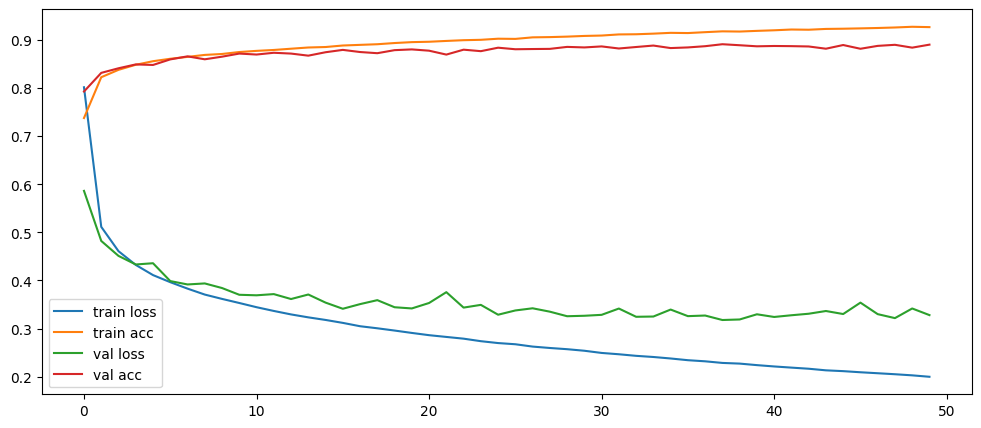

In [19]:
fix , ax = plt.subplots(figsize = (12,5))
ax.plot(history.history["loss"],label="train loss")
ax.plot(history.history["accuracy"],label="train acc")
ax.plot(history.history["val_loss"],label="val loss")
ax.plot(history.history["val_accuracy"],label="val acc")
ax.legend()

In [20]:
model.evaluate(x_test , y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8793 - loss: 0.3534


[0.35125768184661865, 0.8813999891281128]